### 练习回归实例

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import sklearn
from sklearn.datasets import fetch_california_housing

In [48]:
# 获取加利福利亚的房价数据集
house_price = fetch_california_housing()

In [39]:
# 查看数据
print(house_price.data.shape) # 总共8个特征，20640个样本
print(house_price.target.shape)
print(house_price.data[3])
print(house_price.feature_names)
print('-'*30)
print(house_price.target[:3])
print(house_price.target_names) 

(20640, 8)
(20640,)
[   5.6431       52.            5.8173516     1.07305936  558.
    2.54794521   37.85       -122.25      ]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
------------------------------
[4.526 3.585 3.521]
['MedHouseVal']


In [49]:
# 划分训练集、验证集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(house_price.data,house_price.target,test_size=0.2,random_state=22)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25,random_state=11)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(12384, 8) (12384,)
(4128, 8) (4128,)
(4128, 8) (4128,)


In [50]:
# 对数据进行正则化处理
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_val = stand.transform(x_val)
x_test = stand.transform(x_test)

In [53]:
# 开始进行模型的搭建
model = keras.models.Sequential(
    [keras.layers.Dense(50,activation='relu',input_shape=x_train.shape[1:]),
     keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
     keras.layers.Dense(10,activation='relu',input_shape=x_train.shape[1:]),
     keras.layers.Dense(1)]) # 回归直接输出一个数值
model.compile(loss='mean_squared_error',optimizer='Adam')
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

In [54]:
#开始训练
history = model.fit(x_train,y_train,
                    validation_data=(x_val,y_val),
                    epochs=100,
                    callbacks = callbacks)

Epoch 1/100
387/387 [==============================] - 2s 3ms/step - loss: 0.9012 - val_loss: 0.4479
Epoch 2/100
387/387 [==============================] - 1s 4ms/step - loss: 0.4113 - val_loss: 0.3656
Epoch 3/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3740 - val_loss: 0.3468
Epoch 4/100
387/387 [==============================] - 1s 2ms/step - loss: 0.3526 - val_loss: 0.3864
Epoch 5/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3484 - val_loss: 0.3257
Epoch 6/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3349 - val_loss: 0.4554
Epoch 7/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3257 - val_loss: 0.3081
Epoch 8/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3157 - val_loss: 0.3726
Epoch 9/100
387/387 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3451
Epoch 10/100
387/387 [==============================] - 1s 2ms/step - loss: 0.3154 - val_lo

In [55]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


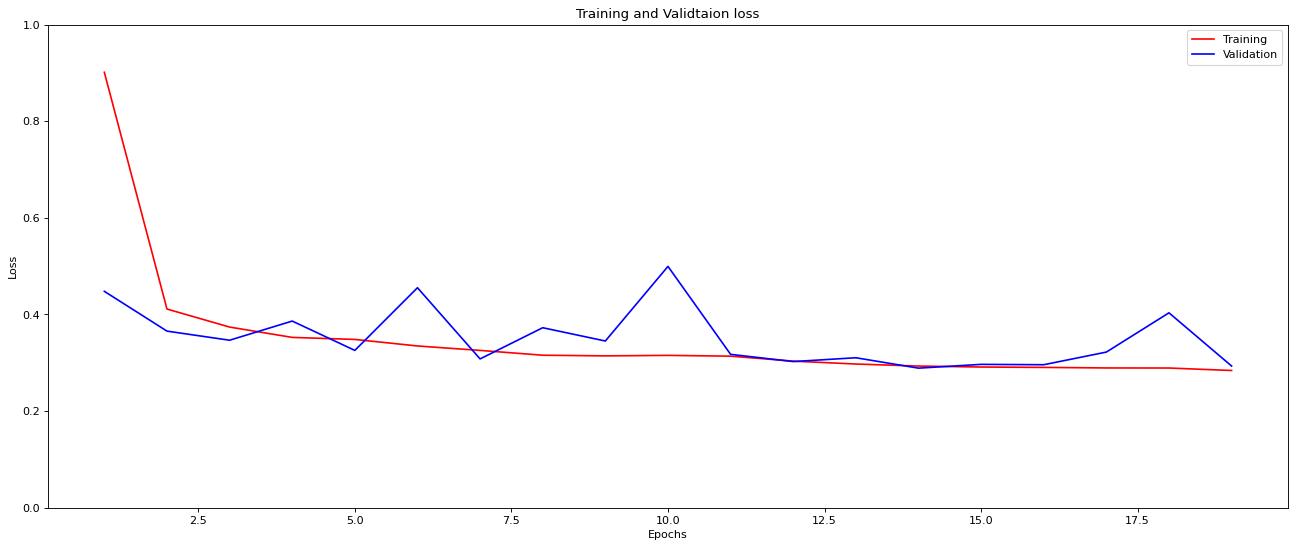

In [56]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(train_loss)+1)
plt.figure(figsize=(20,8),dpi=80)
plt.plot(epochs,train_loss,c='red',label="Training")
plt.plot(epochs,val_loss,c='blue',label="Validation")
plt.title("Training and Validtaion loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [57]:
model.evaluate(x_test,y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.2859


0.28587883710861206

### 建立DNN模型，重新对衣服进行分类

In [111]:
# 导入数据,并划分训练集、验证集和测试集
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [112]:
x_val,x_train = x_train[:10000],x_train[10000:]
y_val,y_train = y_train[:10000],y_train[10000:]
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [113]:
# 对数据集进行标准化
std = StandardScaler()
# 注意std里面只能传入二维的数据，高维的数据进行标准化要先进性reshape
x_train = x_train.reshape(-1,1)
x_train = std.fit_transform(x_train).reshape(-1,28,28)
x_val = x_val.reshape(-1,1)
x_val = std.transform(x_val).reshape(-1,28,28)
x_test = x_test.reshape(-1,1)
x_test = std.transform(x_test).reshape(-1,28,28)

In [ ]:
print(x_train[1])
print(x_val[1])
print(x_test[1])

In [114]:
# 开始搭建DNN，深度神经网络
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 784
for _ in range(5):
  model.add(keras.layers.Dense(400,activation='relu'))
for _ in range(5):
  model.add(keras.layers.Dense(300,activation='relu'))
for _ in range(20):
  model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) # 因为是有10个分类，所以最后的全连接层必须是10个神经元
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9),
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_101 (Dense)           (None, 100)               78500     
                                                                 
 dense_102 (Dense)           (None, 100)               10100     
                                                                 
 dense_103 (Dense)           (None, 100)               10100     
                                                                 
 dense_104 (Dense)           (None, 100)               10100     
                                                                 
 dense_105 (Dense)           (None, 100)               10100     
                                                                 
 dense_106 (Dense)           (None, 100)             

In [115]:
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history = model.fit(x_train,y_train,
                    validation_data = (x_val,y_val),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 2.2994 - accuracy: 0.1181 - val_loss: 2.2823 - val_accuracy: 0.1932
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8891 - accuracy: 0.2558 - val_loss: 1.3385 - val_accuracy: 0.4603
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0769 - accuracy: 0.5633 - val_loss: 0.9540 - val_accuracy: 0.6204
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9398 - accuracy: 0.6269 - val_loss: 0.7825 - val_accuracy: 0.6764
Epoch 5/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8302 - accuracy: 0.6687 - val_loss: 0.6759 - val_accuracy: 0.7497
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6163 - accuracy: 0.7734 - val_loss: 0.5550 - val_accuracy: 0.8084
Epoch 7/100
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5197 - accuracy: 0.8278 - val_loss: 0.4964 -

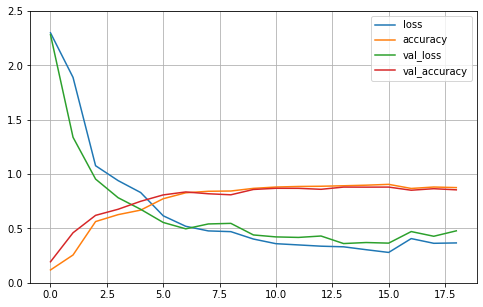

In [116]:
def plot_train_val(history):
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,2.5)
  plt.show()
plot_train_val(history)

In [117]:
# 利用测试集进行模型的评估
model.evaluate(x_test,y_test) # 通过修改前几层网络的宽度，使得最终精度提升了

313/313 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8447


[0.5107675790786743, 0.8446999788284302]